# 패키지

In [30]:
#!pip install nltk
#!pip install wordcloud
#!pip install sklearn

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
import pandas as pd
import numpy as np
import os
import re
from pylab import plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import words
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# 유튜브 데이터 불러오기

In [10]:
os.chdir(r'C:\Users\Administrator\Desktop\구슬기github\global_keyword_trend_innisfree data')
final_youtube_comment = pd.read_csv('youtube_comments.csv')
youtube_comment = final_youtube_comment.copy()

final_youtube_comment.shape

(46969, 4)

In [11]:
final_youtube_comment

,link,comment,comment date,date
0,https://www.youtube.com/watch?v=9q0V_Z8ERVg,언니 영상에 구석구석 나오는 방이 너무 예뻐요! 방소개영상도 볼수있었으면 좋겠어요 🖤🙏🏼,게시일: 2019. 5. 10.,3일 전
1,https://www.youtube.com/watch?v=9q0V_Z8ERVg,오프닝 앤티앤스 부터 심멎.... 크림치즈아몬드 먹구시포요...... 일리윤 리무버...,게시일: 2019. 5. 10.,4일 전
2,https://www.youtube.com/watch?v=9q0V_Z8ERVg,언니 저 댓글처음다는데 언니영상꾸준히보구잇어요 너무이쁘시구❤️ 영상도 너무재밋어요 ...,게시일: 2019. 5. 10.,2일 전
3,https://www.youtube.com/watch?v=9q0V_Z8ERVg,새영님 해면스펀지 정보도 알려주실수 있나용!!??🥺🙏🏻,게시일: 2019. 5. 10.,4일 전
4,https://www.youtube.com/watch?v=9q0V_Z8ERVg,몸매 예뻐요!,게시일: 2019. 5. 10.,3일 전
5,https://www.youtube.com/watch?v=9q0V_Z8ERVg,꺄 새영님💞 본격적으로 하시기 전에 박수치시는거 넘나 기여워여>< 영상 오래오래 올...,게시일: 2019. 5. 10.,4일 전
6,https://www.youtube.com/watch?v=9q0V_Z8ERVg,학교도 그렇게 이쁘게 해서 가면 어떡하나요😉😉💙💙,게시일: 2019. 5. 10.,4일 전
7,https://www.youtube.com/watch?v=9q0V_Z8ERVg,앗싸 새영님 영상 1빠... ❤️ 오랜만에 댓글 다는거 같은데 항상 잘보구있어용 >...,게시일: 2019. 5. 10.,4일 전
8,https://www.youtube.com/watch?v=9q0V_Z8ERVg,귀여워이ㅠㅠㅠ 전 얼빠가 확실합니다...❤️😊,게시일: 2019. 5. 10.,2일 전
9,https://www.youtube.com/watch?v=9q0V_Z8ERVg,처음입고나온 아우터랑 원피스궁금해요,게시일: 2019. 5. 10.,4일 전


In [12]:
# 한글 제거
youtube_korean_comment = final_youtube_comment['comment'].apply(lambda x: re.sub('[^가-힣]',' ',str(x)).strip())
final_youtube_comment = youtube_comment.loc[youtube_korean_comment[youtube_korean_comment.str.len()== 0].index]
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: str(x).lower())

# 영어만 남기기. 특수문자 제거
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('[^a-zA-Z0-9@]',' ',str(x)).strip())

# 날짜 yyyymmdd 형태로 변환
final_youtube_comment['comment date'] = final_youtube_comment['comment date'].apply(lambda x: datetime.strptime("/".join(re.findall('\d+', x)), '%Y/%m/%d').strftime('%Y%m%d'))
final_youtube_comment['yyyy'] = final_youtube_comment['comment date'].apply(lambda x: x[0:4])
final_youtube_comment['mm']   = final_youtube_comment['comment date'].apply(lambda x: x[4:6])

# 분기 추가
final_youtube_comment['quarter'] = final_youtube_comment['mm'].apply(lambda x: ((int(x)-1)//3 + 1))

In [13]:
# 3글자 이상인 것만 남기기
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('vnd|status|share|com|via|aku|photo|link|http|https|jpg|twitter|jpg|instagram|www|weibo|the|posts','', str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('pemenang|untunk|orang|poem|lake|isle','', str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('caixukun|chenlinong|fanchengcheng','', str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('rt|dm','', str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('/s+',' ', str(x)))

In [14]:
# 비슷한 의미의 단어들 한 단어로 통일시키기
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lee minho|lee min ho|actorleeminho|minoz','leeminho',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('yoon a','yoona',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('wanna one|wan na one','wannaone',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('cleaning|cleanser','cleansing',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('creaming|creams','cream',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('handscream','handcream',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('packs','pack',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('baga','',str(x)))

In [15]:
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('posters','poster',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('kits','kit',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('reviews','review',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('videos','video',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('joankeem','joan',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('from|with|this|that','',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('alwaysleeminho','',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('give away','giveaway',str(x)))

In [16]:
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('bihday','birthday',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('vein','',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('leg','',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lip balm','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lip balms','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lipbalms','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lipbalm','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lipstick','lip',str(x)))

In [17]:
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lip concealer','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lip cheek','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lip cream','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lipcream','lip',str(x)))

In [18]:
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lip tint','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('liptint','lip',str(x) ))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lipgloss','lip',str(x)))

In [19]:
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lips','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lipglow','lip',str(x)))   
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lipstik','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('lip glow','lip',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('no sebum','nosebum',str(x)))
final_youtube_comment['comment'] = final_youtube_comment['comment'].apply(lambda x: re.sub('girls generation|girlsgeneration','snsd',str(x)))

## 이상 키워드 확인

In [20]:
baddrop=['https://www.youtube.com/watch?v=w5QqwN-3pcw',
 'https://www.youtube.com/watch?v=hGoaQ433wnw',
 'https://www.youtube.com/watch?v=GRVW3-INmZ0',
 'https://www.youtube.com/watch?v=oyfB_fvnJ2g',
 'https://www.youtube.com/watch?v=-A5hbpB94LA',
 'https://www.youtube.com/watch?v=QXXVY3lO0SI',
 'https://www.youtube.com/watch?v=z4bfiTR2kBA',
 'https://www.youtube.com/watch?v=mhD3SZYjXdE',
 'https://www.youtube.com/watch?v=W5bPoWtBWmQ',
 'https://www.youtube.com/watch?v=tRaY5q4CaPQ',
 'https://www.youtube.com/watch?v=hjaWBWAGyRw',
 'https://www.youtube.com/watch?v=bK2_i7c_Jk0',
 'https://www.youtube.com/watch?v=qgXJ5tyP5ZA',
 'https://www.youtube.com/watch?v=picpoe_7yck',
 'https://www.youtube.com/watch?v=RfYGF7PkhhE',
 'https://www.youtube.com/watch?v=K-Yn6TezmYQ',
 'https://www.youtube.com/watch?v=Qy5qjWrN6TQ',
 'https://www.youtube.com/watch?v=w7rYE_PMWVg',
 'https://www.youtube.com/watch?v=TfDsVB8fuYI',
 'https://www.youtube.com/watch?v=dZHp5DIzXQk',
 'https://www.youtube.com/watch?v=v3kK2vpEo0M',
 'https://www.youtube.com/watch?v=wNZCWLOFnUg',
 'https://www.youtube.com/watch?v=-PQb-h6lI48',
 'https://www.youtube.com/watch?v=2dMPz8UHhwg',
 'https://www.youtube.com/watch?v=NQSdJHKVbxU',
 'https://www.youtube.com/watch?v=1xn7rjlOxfc',
 'https://www.youtube.com/watch?v=IR4ZeeqC8YY',
 'https://www.youtube.com/watch?v=gT75gKtN2MM',
 'https://www.youtube.com/watch?v=gqFhQFgClNY',
 'https://www.youtube.com/watch?v=3oLnVj953yg',
 'https://www.youtube.com/watch?v=y27ktWMR1ms',
 'https://www.youtube.com/watch?v=qWYzDdEH8Q8',
 'https://www.youtube.com/watch?v=6ICrEjKf8SQ',
 'https://www.youtube.com/watch?v=JOJA0tia66E',
 'https://www.youtube.com/watch?v=bPI8o6RvmQs',
 'https://www.youtube.com/watch?v=lh_aO4lT7IU',
 'https://www.youtube.com/watch?v=LHMEqppr-Bw',
 'https://www.youtube.com/watch?v=Lyz0aw4ySE8',
 'https://www.youtube.com/watch?v=xsN_F3nIQcA',
 'https://www.youtube.com/watch?v=YsvW3bI-83U',
 'https://www.youtube.com/watch?v=rlWBrDX3rPs',
 'https://www.youtube.com/watch?v=L3e2Vy4ssTY',
 'https://www.youtube.com/watch?v=vMzz68hCiNQ',
 'https://www.youtube.com/watch?v=bGPIhN1Z9GA',
 'https://www.youtube.com/watch?v=l33XEjckugQ',
 'https://www.youtube.com/watch?v=djKAnP2wU3M',
 'https://www.youtube.com/watch?v=dllHsQIDlOk',
 'https://www.youtube.com/watch?v=qXepD6mezqI',
 'https://www.youtube.com/watch?v=aKghT5r-oMo',
 'https://www.youtube.com/watch?v=wrlH-tWppds',
 'https://www.youtube.com/watch?v=yTgW4kH4OYA',
 'https://www.youtube.com/watch?v=xi9WQVdunhc',
 'https://www.youtube.com/watch?v=1oooZU3qZvs',
 'https://www.youtube.com/watch?v=IN_PKv35Wug',
 'https://www.youtube.com/watch?v=Te2LFHnEkPA',
 'https://www.youtube.com/watch?v=TleIuj9xIYE',
 'https://www.youtube.com/watch?v=ZsEdoHRgV9c',
 'https://www.youtube.com/watch?v=-klUcRlKTjw',
 'https://www.youtube.com/watch?v=fTWcPQv7MTg',
 'https://www.youtube.com/watch?v=ByZg_FM172w',
 'https://www.youtube.com/watch?v=-bJkKevvslY',
 'https://www.youtube.com/watch?v=OJpePhubQxk',
 'https://www.youtube.com/watch?v=_r40oolveTM',
 'https://www.youtube.com/watch?v=4ptVEZ0vEEE',
 'https://www.youtube.com/watch?v=THlygtNRuOY',
 'https://www.youtube.com/watch?v=NDe7OpWAyg0',
 'https://www.youtube.com/watch?v=_BxOd-XDd9g',
 'https://www.youtube.com/watch?v=BNrWr317CPg',
 'https://www.youtube.com/watch?v=QLlcvQg9i6c',
 'https://www.youtube.com/watch?v=Q2szIu8whCM',
 'https://www.youtube.com/watch?v=jALHv0qmTDQ',
 'https://www.youtube.com/watch?v=Zd-XqF2LXgU',
 'https://www.youtube.com/watch?v=rqOQ5WMGQiI',
 'https://www.youtube.com/watch?v=RRUcBr1tjwM',
 'https://www.youtube.com/watch?v=77mwTX1nW5E',
 'https://www.youtube.com/watch?v=5QerxpC-5Qg',
 'https://www.youtube.com/watch?v=l9YykzLSukw',
 'https://www.youtube.com/watch?v=sHnuo23mRWY',
 'https://www.youtube.com/watch?v=MZwiDPfu1nE',
 'https://www.youtube.com/watch?v=lt2Qbl9wgtc',
 'https://www.youtube.com/watch?v=So6kgO-ZXh4',
 'https://www.youtube.com/watch?v=QkZxoko_HC0',
 'https://www.youtube.com/watch?v=ypg6c-RJCak',
 'https://www.youtube.com/watch?v=G7o9PdcKB94',
 'https://www.youtube.com/watch?v=CGCJbCj-xN8',
 'https://www.youtube.com/watch?v=7QgXYfAGQMg',
 'https://www.youtube.com/watch?v=h8SMRpE_6bg']

In [21]:
# 동영상 제거
for x in final_youtube_comment.index.values:
    if(final_youtube_comment.loc[x].link in baddrop):
        final_youtube_comment = final_youtube_comment.drop(x)

In [23]:
stwo = [
    '이니스프리','innisfree','could','thing','banget','pake','think','hope','great','cut','always','pretty','also'
    ,'thanks','would','thank','look','really','aku','jerawat','juga','sama','udah','dong','tapi','yang','kulit'
    ,'suka','beli','jadi','buat','akka','erica','hehe','much','girl','gmail','joan','anne','love','like','watch'
    ,'watching','voice','xanh' ,'mong','email','chepparu','trinh','myra','pasabog','dibagian','bawah','mata','gustong'
    ,'spider','csigany','dolgok','loha','essa','essas','marcas','coreanas','huhu','haszn','annyira','chala','sakin'
    ,'garu','ohaha','tomm','nisa','spider','vein','tengok','kita','leg','untung','yoonai'
]

In [26]:
# 불용어
stwo = stopwords.words('english') + stwo

In [27]:
#동영상 별 코멘트를 도큐멘트 화
cpv=final_youtube_comment.groupby(['link']).comment.sum()

In [28]:
# 공백 여러개 되있는거 제거
cpv = cpv.apply(lambda x: re.sub(' +', " ",str(x)).strip())

In [31]:
cpv_com = []
n_min = 3
lemmatizer = WordNetLemmatizer()
for line in cpv:
    pre = re.sub(r'\W', ' ', str(line))                             # 특수문자 제외. Space로 대체!
    pre = pre.lower()
    pre = nltk.word_tokenize(pre)
    pre = [x for x in pre if len(x) > n_min]                        # 최소 길이 충족.
    pre = [x for x in pre if x not in stwo]   # 불용어 처리.
    pre = [lemmatizer.lemmatize(x) for x in pre]                    # 원형 복원.
    cpv_com += pre

### TF-IDF 생성

In [32]:
vectorizer = TfidfVectorizer(max_features = 10000, min_df = 100, max_df = 5000, stop_words = stwo)
X = vectorizer.fit_transform(cpv.values).toarray()

In [33]:
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1206255  0.02296543 ... 0.24829692 0.         0.        ]
 [0.         0.         0.         ... 0.58330963 0.         0.        ]
 ...
 [0.06045486 0.         0.12882171 ... 0.37141086 0.05828758 0.        ]
 [0.         0.01601996 0.01524989 ... 0.25281341 0.         0.        ]
 [0.         0.         0.         ... 0.28830313 0.         0.        ]]


### 코사인 유사도 생성 

In [34]:
X = 1 - np.round(pairwise_distances(X, metric="cosine"),3)

### kmeans 모델링 

In [35]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### 클러스터 별 댓글 갯수 확인

In [36]:
pd.Series(kmeans.labels_).value_counts()

1    221
0    216
dtype: int64

#### 클러스터 별 댓글 확인

In [37]:
# 총 다큐먼트 갯수 
len(kmeans.labels_)

437

# 총 다큐먼트 갯수 
len(kmeans.labels_)

In [39]:
res = pd.Series(kmeans.labels_)
group_0 = pd.DataFrame(cpv.values)[res==0]
group_1 = pd.DataFrame(cpv.values)[res==1]

# 워드 클라우드로 집단별 군집 확인

In [40]:
def corpus(data):
    n_min = 3
    corpus = []
    lemmatizer = WordNetLemmatizer()
    
    for line in data:
        pre = str(line)
        pre = nltk.word_tokenize(pre)
        pre = [x for x in pre if len(x) > n_min]
        pre = [x for x in pre if x not in stwo]
        pre = [lemmatizer.lemmatize(x) for x in pre]    
        corpus += pre
    return corpus

In [41]:
corpus_0 = corpus(group_0[0])

In [42]:
len(corpus_0)

126736

In [43]:
corpus_1 = corpus(group_1[0])

In [44]:
len(corpus_1)

12061

#### 단어빈도 카운팅

In [46]:
freq_0 = nltk.FreqDist(corpus_0)
freq_0.most_common(20)
freq_1 = nltk.FreqDist(corpus_1)
freq_1.most_common(20)

print('group_0')
for i,j in enumerate(freq_0.most_common(20)) :
    print(f'{i}: {j}')

print('group_1')
for i,j in enumerate(freq_1.most_common(20)) :
    print(f'{i}: {j}')

group_0
0: ('video', 2712)
1: ('skin', 2208)
2: ('product', 1708)
3: ('review', 1184)
4: ('make', 960)
5: ('good', 764)
6: ('makeup', 735)
7: ('mask', 706)
8: ('green', 649)
9: ('face', 642)
10: ('know', 624)
11: ('serum', 581)
12: ('time', 576)
13: ('korean', 571)
14: ('skincare', 559)
15: ('please', 531)
16: ('want', 509)
17: ('oily', 495)
18: ('care', 461)
19: ('cream', 459)
group_1
0: ('yoona', 334)
1: ('want', 138)
2: ('vlog', 135)
3: ('beautiful', 115)
4: ('cute', 95)
5: ('eunice', 79)
6: ('mommy', 76)
7: ('shoe', 65)
8: ('make', 61)
9: ('please', 48)
10: ('christmas', 46)
11: ('size', 46)
12: ('good', 41)
13: ('birthday', 41)
14: ('yung', 41)
15: ('goddess', 39)
16: ('video', 37)
17: ('gusto', 37)
18: ('wish', 36)
19: ('need', 35)


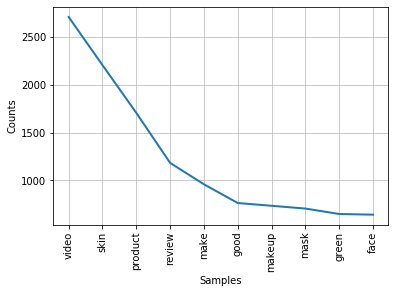

In [47]:
freq_0.plot(10)

#### Biagram 빈도 카운팅

In [48]:
print('group_0')
bigrams_0 = nltk.bigrams(corpus_0)
freq_bi_0 = nltk.FreqDist(bigrams_0)
for i,j in enumerate(freq_bi_0.most_common(20)) :
    print(f'{i}: {j}')

print('group_1')
bigrams_1 = nltk.bigrams(corpus_1)
freq_bi_1 = nltk.FreqDist(bigrams_1)
for i,j in enumerate(freq_bi_1.most_common(20)) :
    print(f'{i}: {j}')

group_0
0: (('skin', 'care'), 230)
1: (('oily', 'skin'), 219)
2: (('green', 'seed'), 152)
3: (('etude', 'house'), 130)
4: (('seed', 'serum'), 129)
5: (('clay', 'mask'), 120)
6: (('make', 'video'), 112)
7: (('sheet', 'mask'), 111)
8: (('care', 'routine'), 103)
9: (('acne', 'prone'), 100)
10: (('skincare', 'routine'), 91)
11: (('bija', 'cica'), 88)
12: (('cica', 'balm'), 87)
13: (('sensitive', 'skin'), 83)
14: (('skincare', 'product'), 76)
15: (('skin', 'type'), 75)
16: (('bination', 'skin'), 75)
17: (('korean', 'skincare'), 70)
18: (('face', 'shop'), 70)
19: (('looking', 'forward'), 69)
group_1
0: (('yoona', 'yoona'), 82)
1: (('christmas', 'gift'), 17)
2: (('south', 'korea'), 12)
3: (('vlog', 'birthday'), 12)
4: (('birthday', 'celebration'), 11)
5: (('goddess', 'yoona'), 10)
6: (('eunice', 'mommy'), 10)
7: (('vlog', 'mommy'), 10)
8: (('mommy', 'birthday'), 10)
9: (('want', 'yoona'), 9)
10: (('yoona', 'beautiful'), 9)
11: (('filum', 'disruptor'), 9)
12: (('vlog', 'south'), 9)
13: (('want

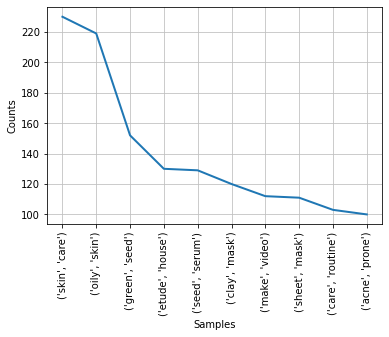

In [49]:
freq_bi_0.plot(10)

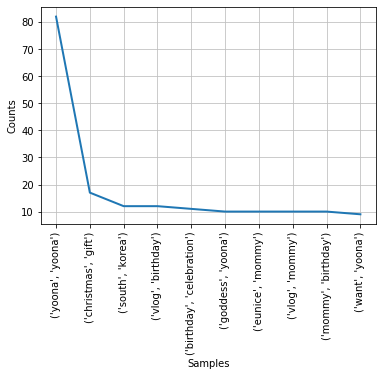

In [50]:
freq_bi_1.plot(10)

#### trigram 빈도 카운팅

In [51]:
print('group_0')
trigrams_0 = nltk.trigrams(corpus_0)
freq_tri_0 = nltk.FreqDist(trigrams_0)
for i,j in enumerate(freq_tri_0.most_common(20)) :
    print(f'{i}: {j}')

print('group_1')
trigrams_1 = nltk.trigrams(corpus_1)
freq_tri_1 = nltk.FreqDist(trigrams_1)
for i,j in enumerate(freq_tri_1.most_common(20)) :
    print(f'{i}: {j}')

group_0
0: (('green', 'seed', 'serum'), 106)
1: (('bija', 'cica', 'balm'), 68)
2: (('acne', 'prone', 'skin'), 57)
3: (('skin', 'care', 'product'), 49)
4: (('skin', 'care', 'routine'), 41)
5: (('volcanic', 'clay', 'mask'), 31)
6: (('pore', 'clay', 'mask'), 31)
7: (('korean', 'skin', 'care'), 31)
8: (('volcanic', 'pore', 'clay'), 29)
9: (('ready', 'makeup', 'routine'), 26)
10: (('overnight', 'care', 'routine'), 26)
11: (('oily', 'acne', 'prone'), 25)
12: (('super', 'volcanic', 'pore'), 24)
13: (('please', 'make', 'video'), 24)
14: (('long', 'wear', 'cushion'), 19)
15: (('care', 'oily', 'skin'), 19)
16: (('super', 'volcanic', 'clay'), 18)
17: (('spending', 'time', 'family'), 17)
18: (('nosebum', 'mineral', 'powder'), 15)
19: (('special', 'care', 'oily'), 15)
group_1
0: (('yoona', 'yoona', 'yoona'), 75)
1: (('vlog', 'south', 'korea'), 9)
2: (('vlog', 'birthday', 'celebration'), 9)
3: (('vlog', 'mommy', 'birthday'), 8)
4: (('want', 'eunice', 'christmas'), 5)
5: (('eunice', 'christmas', 'gif

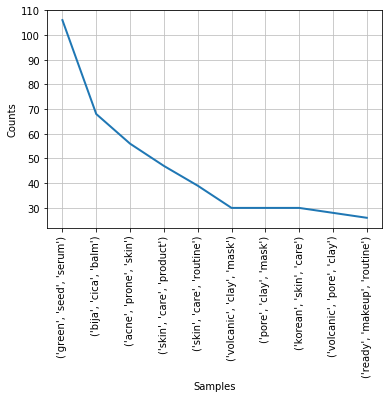

In [41]:
freq_tri_0.plot(10)

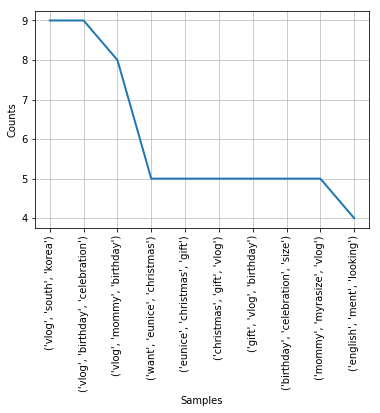

In [42]:
freq_tri_1.plot(10)